This notebook was created for the my portfolio as self guided exercise.

This dataset is downloaded from kaggle and contains information on domestic violence against women in a specific rural area of a developing country. The data is collected to help understand the correlation between various socio-economic factors and domestic violence.

Dataset Content
SL. No: Serial number of the record.
Age: Age of the respondent.
Education: Educational attainment of the respondent
Employment: Employment status of the respondent.
Income: Income level of the respondent
Marital status: Marital status of the respondent
Violence: Indicates whether the respondent has experienced domestic violence
Context

***SECTION 1.0 Understand the Data***

Libraries

In [39]:
#import libraries
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from scipy.stats import chi2_contingency
import os

Load Data

In [40]:
#load csv file
df = read_csv('Domestic violence.csv')

Explore Data

In [41]:
df.head()

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SL. No           347 non-null    int64 
 1   Age              347 non-null    int64 
 2   Education        347 non-null    object
 3   Employment       347 non-null    object
 4   Income           347 non-null    int64 
 5   Marital status   347 non-null    object
 6   Violence         347 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.1+ KB


In [43]:
#look at column names. Some white spaces need to be removed
print(df.columns)

Index(['SL. No', 'Age', 'Education ', 'Employment ', 'Income',
       'Marital status ', 'Violence '],
      dtype='object')


In [44]:
#drop column that is not needed
df.drop(columns=['SL. No'], inplace=True)

In [45]:
#Clean up of Column Names
df.columns = df.columns.str.replace(' ', '', regex=False) #remove spaces
df.rename(columns={'Maritalstatus': 'Marital_Status'}, inplace=True) #rename

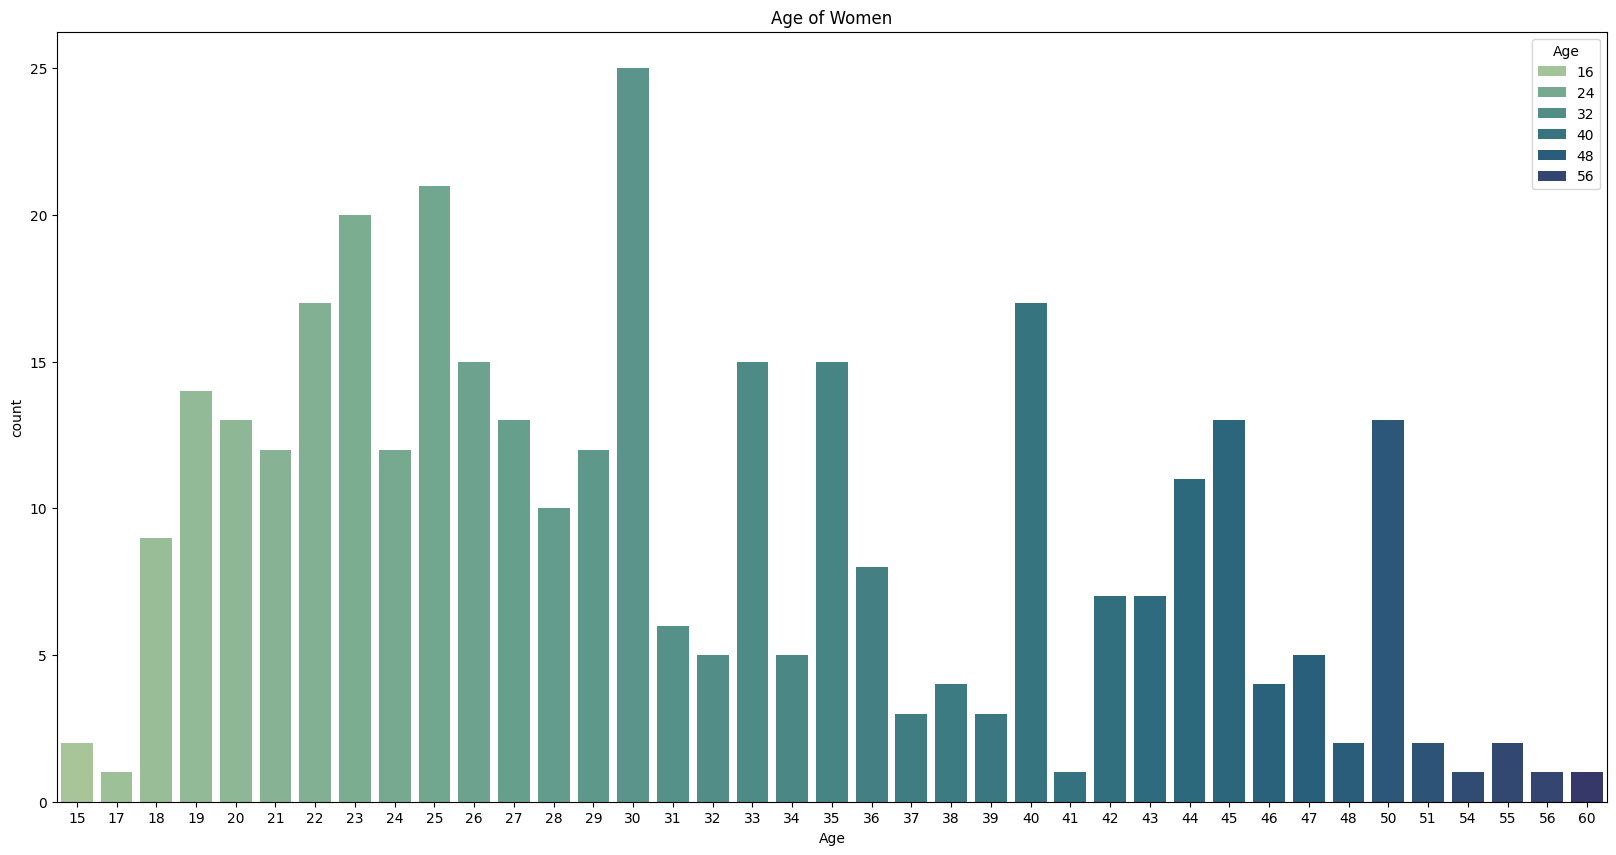

In [46]:
#Generate plot of all womens ages
plt.figure(figsize=(20, 10))
plt.title("Age of Women")
plt.xlabel("Age")
sns.countplot(x='Age',data=df, hue = 'Age', palette='crest')
plt.show()

In [47]:
average_age = df['Age'].mean()
print(average_age)

31.380403458213255


In [48]:
df['Age'].skew()

np.float64(0.5721273170396585)

In [49]:
df['Age'].max() - df['Age'].min()

45

In [50]:
df['Age'].median()

30.0

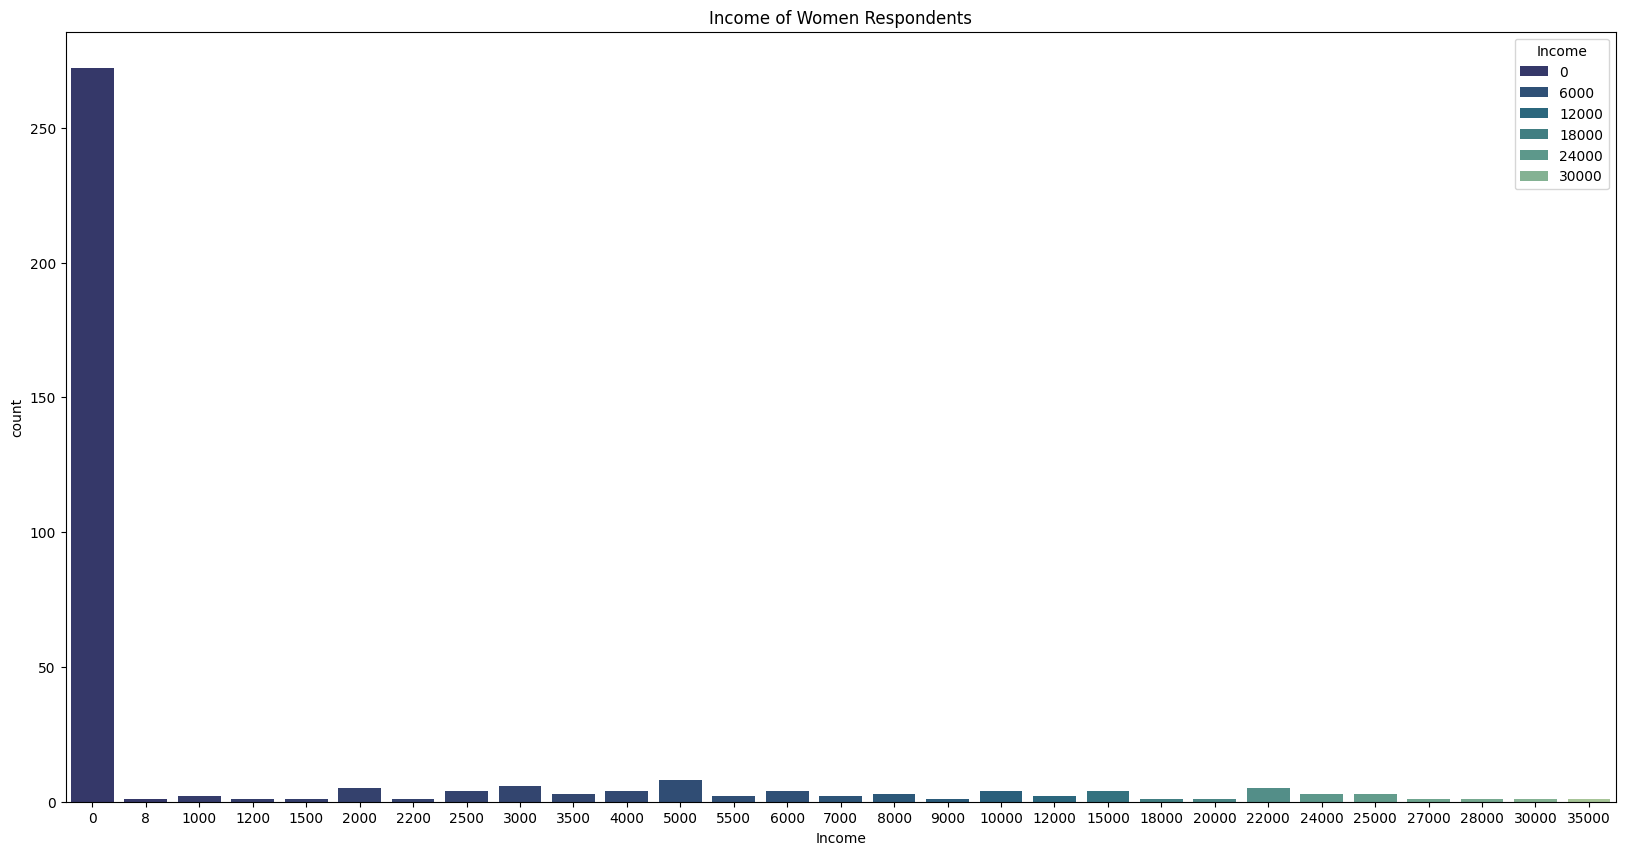

In [51]:
#Income of women respondents
plt.figure(figsize=(20, 10))
plt.title("Income of Women Respondents")
plt.xlabel("Income")
sns.countplot(x='Income',data=df, hue= 'Income', palette='crest_r')
plt.show()

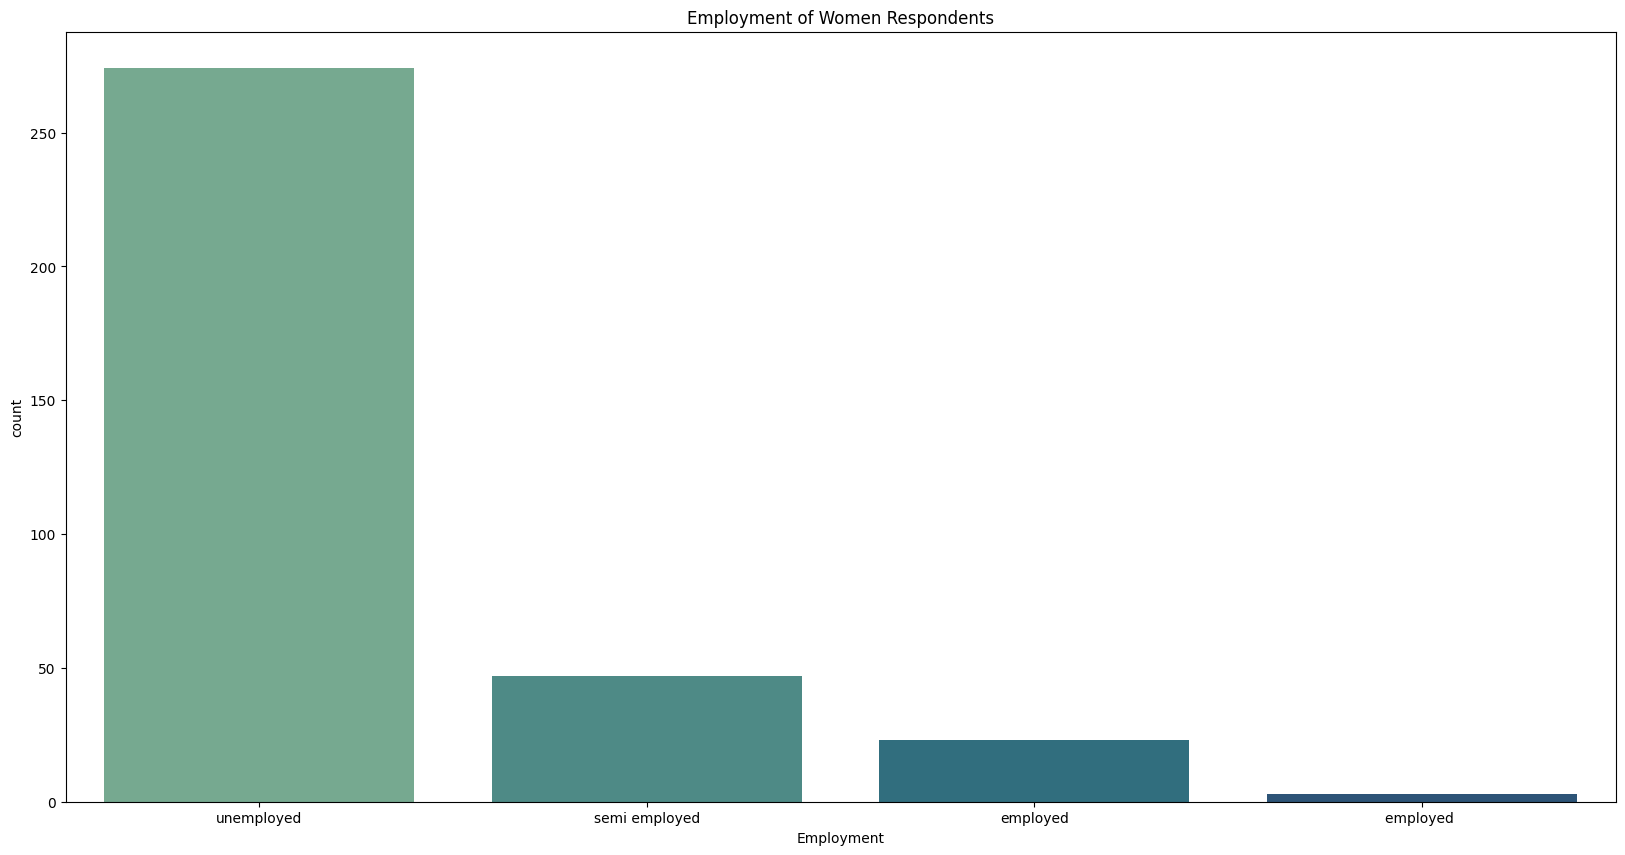

In [52]:
plt.figure(figsize=(20, 10))
plt.title("Employment of Women Respondents")
plt.xlabel("Employment")
sns.countplot(x='Employment',data=df, hue= 'Employment', palette='crest')
plt.show()

There might be an extra space here on the 'employed' category. This needs to be cleaned up to achieve proper analysis.

In [53]:
df['Employment'] = df['Employment'].astype(str)              #Convert to string
df['Employment'] = df['Employment'].str.strip()              #Remove leading/trailing whitespace
df['Employment'] = df['Employment'].str.replace(r'\s+', ' ', regex=True)  #normalize

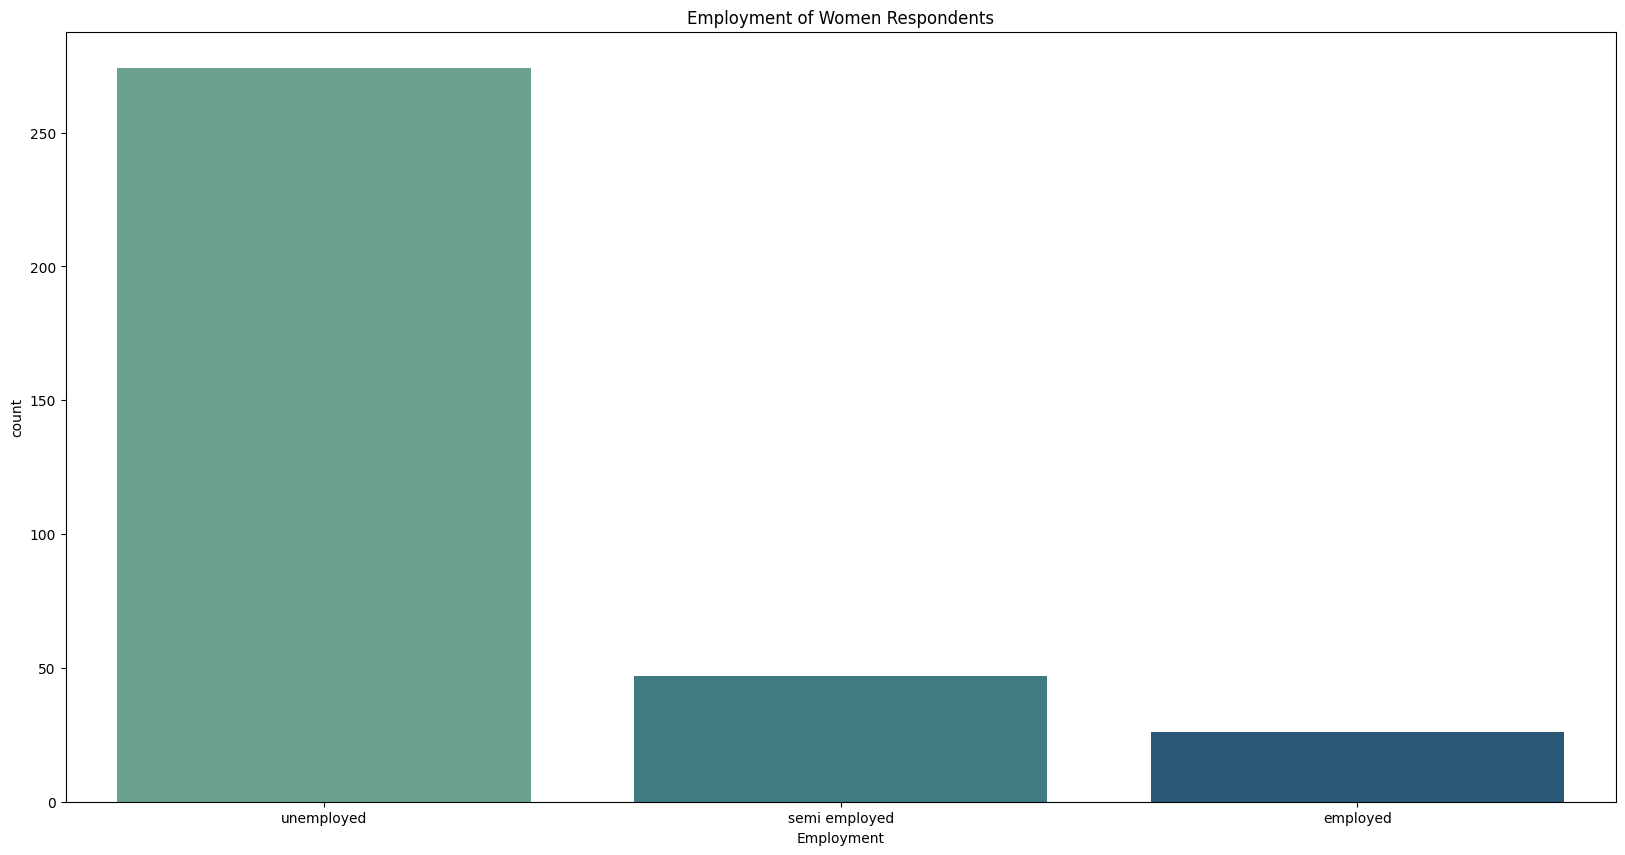

In [54]:
#Plot of Employment
plt.figure(figsize=(20, 10))
plt.title("Employment of Women Respondents")
plt.xlabel("Employment")
sns.countplot(x='Employment',data=df, hue= 'Employment', palette='crest')
plt.show()

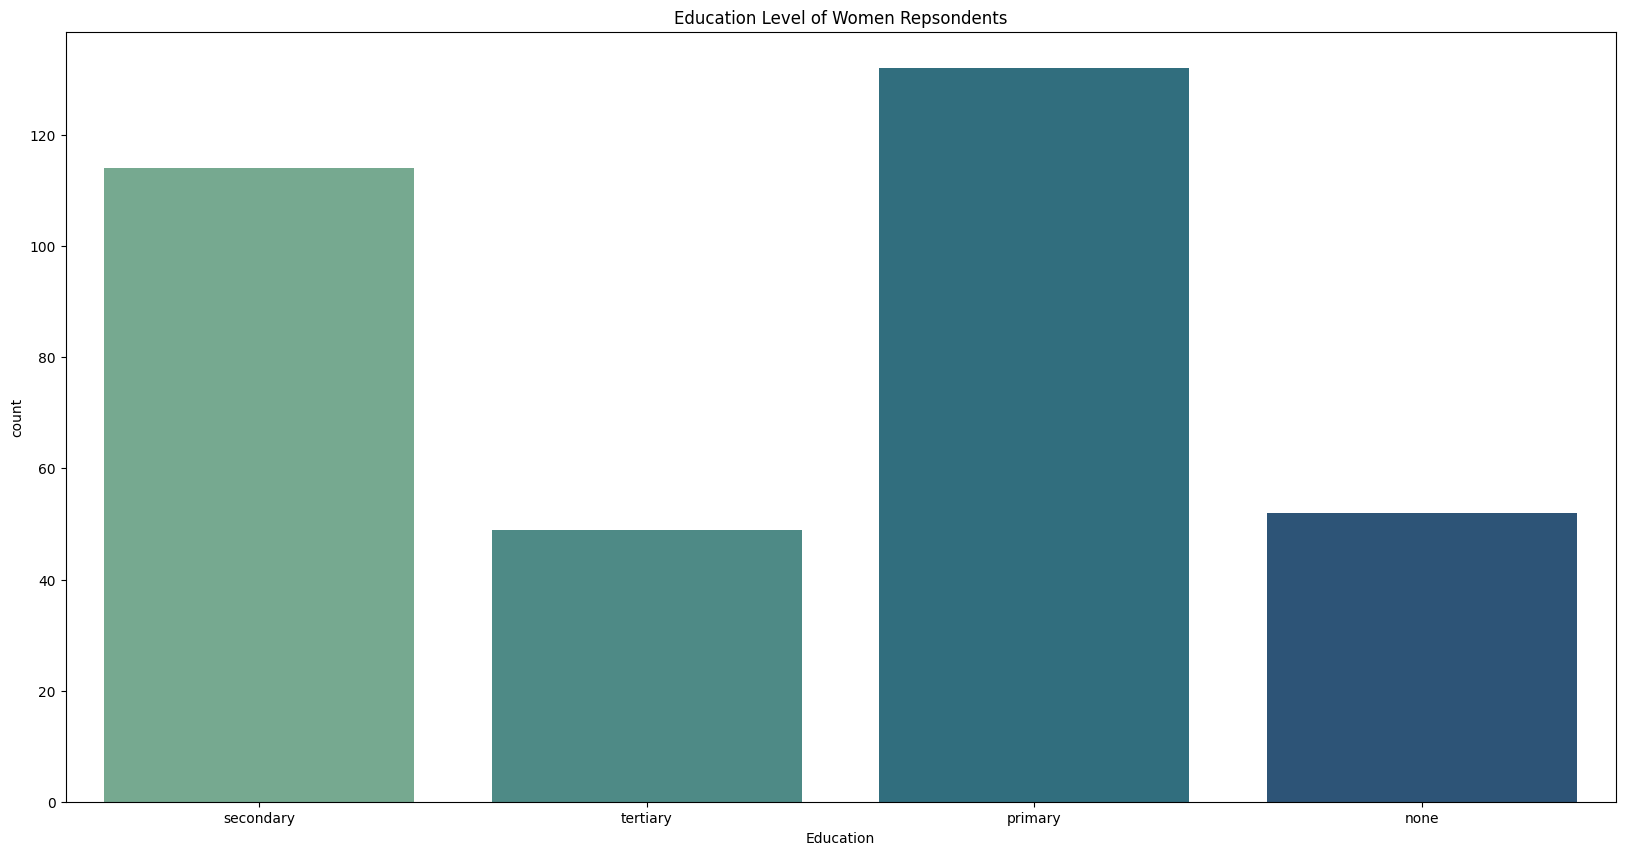

In [55]:
#Eduaction Level
plt.figure(figsize=(20, 10))
plt.title("Education Level of Women Repsondents")
plt.xlabel("Education")
sns.countplot(x='Education',data=df, hue= 'Education', palette='crest')
plt.show()

In [56]:
df['Education'].value_counts()

,count
Education,
primary,132
secondary,114
none,52
tertiary,49


In [57]:
#Check for imbalanace in target since modeling later
df['Violence'].value_counts(normalize=True) #check for balance

,proportion
Violence,
no,0.752161
yes,0.247839


In [58]:
#Correct mispelling
df['Marital_Status'] = df['Marital_Status'].replace('unmarred', 'unmarried')

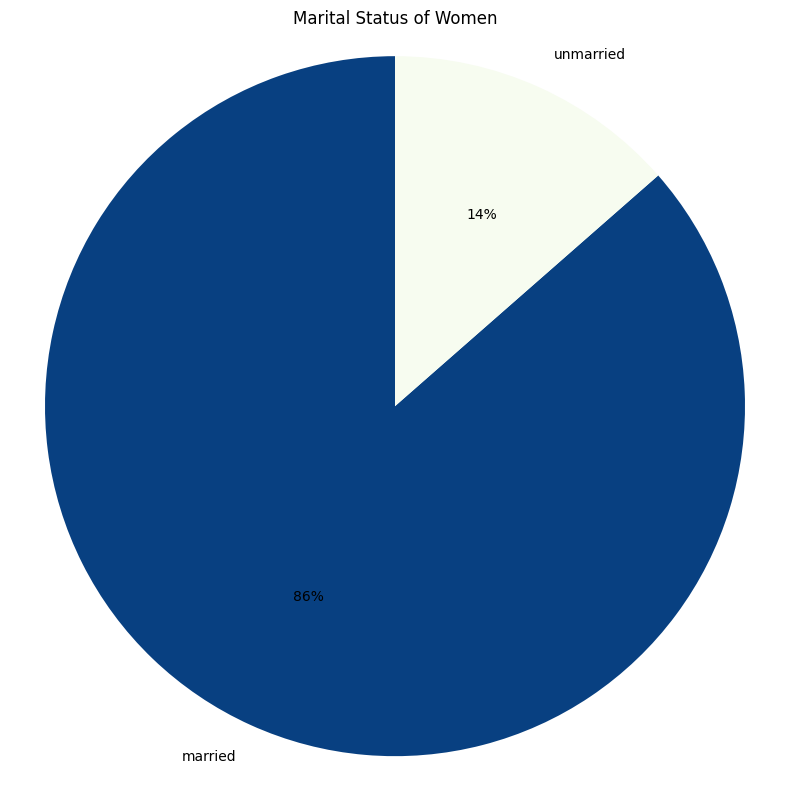

In [59]:
#count values
marital_counts = df['Marital_Status'].value_counts()

cmap = plt.cm.GnBu_r
colors = cmap(np.linspace(0, 1, len(marital_counts))) #colormap

#pie chart
plt.figure(figsize=(8, 8))
plt.title("Marital Status of Women")

plt.pie(
    marital_counts,
    labels=marital_counts.index,
    autopct='%1.0f%%',
    startangle=90,
    colors=colors
)

plt.axis('equal')
plt.tight_layout()
plt.show()

***Section 1.1 Initial Data Exploration Analysis***

Basic data exploration was performed to understand the each feature and identify any potiential issues. The age plot shows distribution of age in the dataset. The age range spans 45 years with the minimum at 15 and the maximum at 60 years old. The average age is 31 years old. The Income of Women Repsondents graph indicates that 72% of the women have zero income while the Education of Women Repsondents plot shows that only 14% of women have no education. The marital status chart indicates that 86% of women respondants are married.

***Section 2.0 Further Data Exploration Analysis***

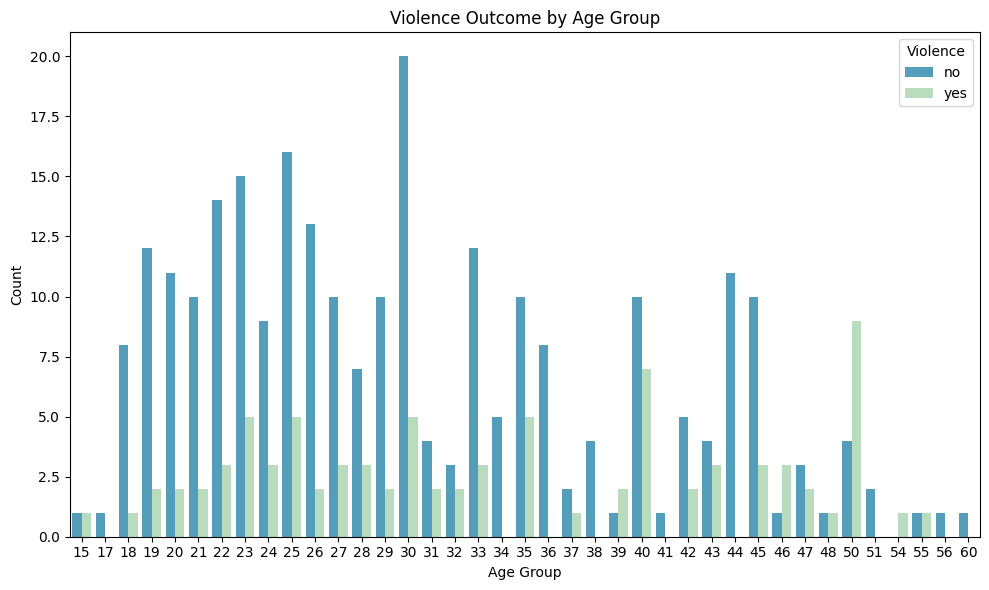

In [60]:
#Violence Outcome by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', hue='Violence', palette='GnBu_r')

plt.title('Violence Outcome by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Violence')
plt.tight_layout()
plt.show()

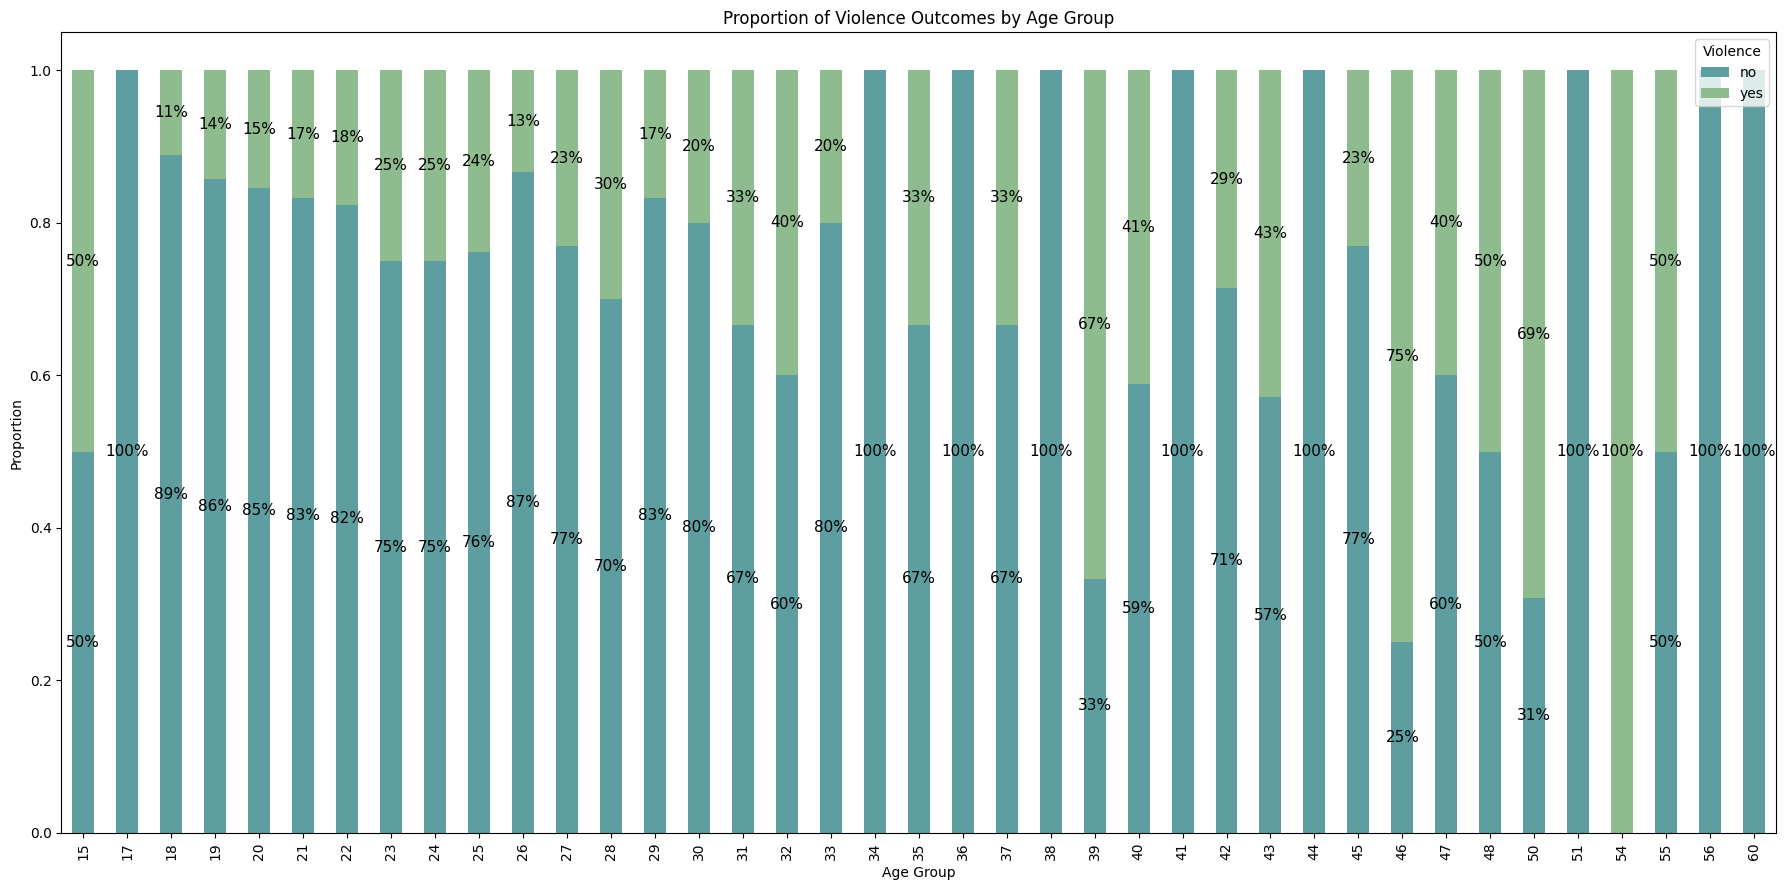

In [61]:
#Proporation of Violence Outcomes by Age Group
age_violence = pd.crosstab(df['Age'], df['Violence'], normalize='index')

custom_colors = ['cadetblue', 'darkseagreen']

# Plot
ax = age_violence.plot(kind='bar', stacked=True, figsize=(18, 9), color=custom_colors)

#percentage labels
for i, age_group in enumerate(age_violence.index):
    cumulative = 0
    for violence_cat in age_violence.columns:
        value = age_violence.loc[age_group, violence_cat]
        if value > 0.03:
            ax.text(i, cumulative + value / 2, f"{round(value*100)}%", ha='center', va='center', fontsize=11)
        cumulative += value

plt.title('Proportion of Violence Outcomes by Age Group')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Violence')
plt.tight_layout()
plt.show()

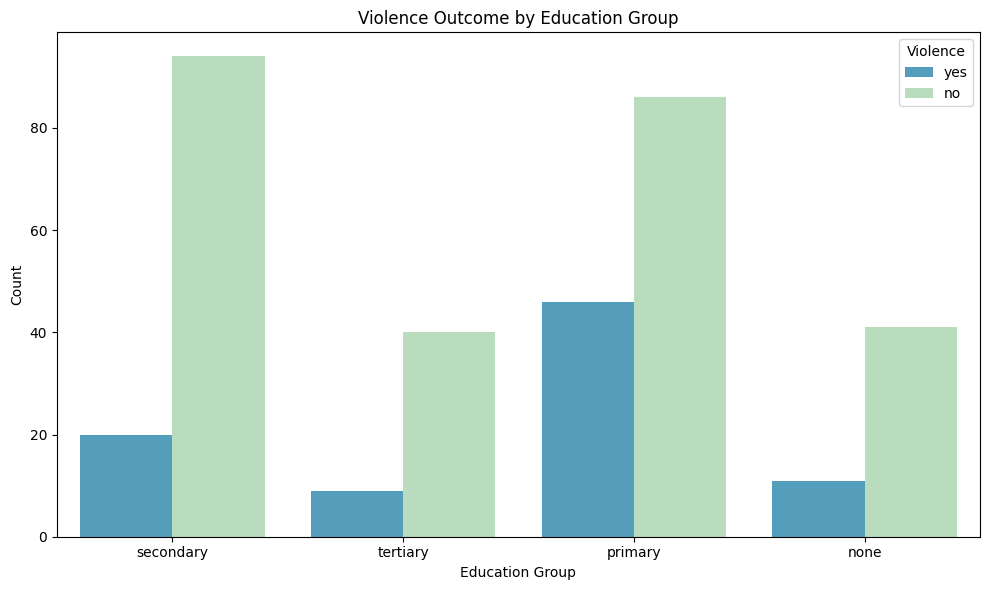

In [62]:
#Violence Outcome by Education Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education', hue='Violence', palette='GnBu_r')

plt.title('Violence Outcome by Education Group')
plt.xlabel('Education Group')
plt.ylabel('Count')
plt.legend(title='Violence')
plt.tight_layout()
plt.show()

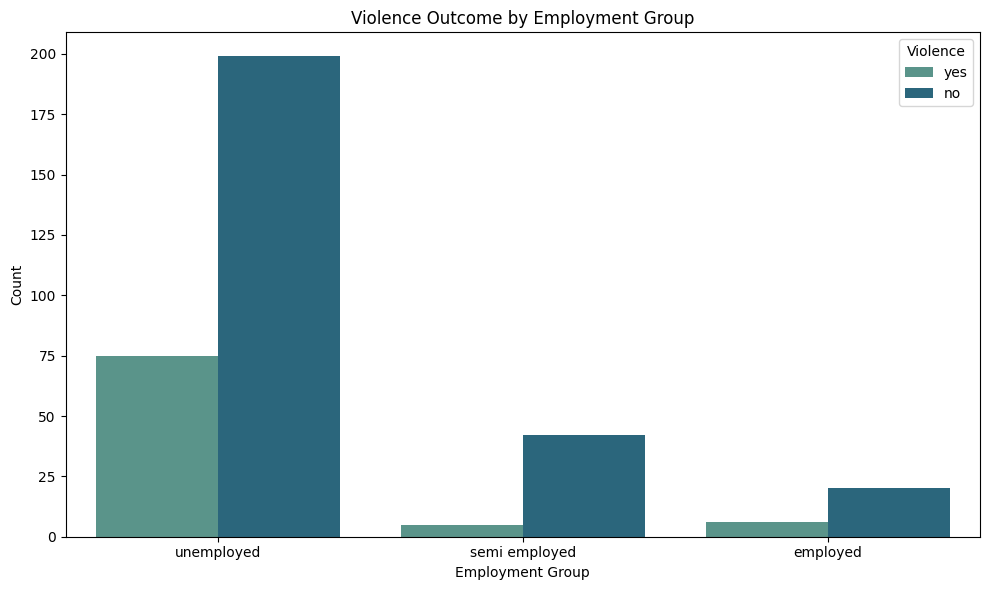

In [63]:
#Violence Outcome by Employment Group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employment', hue='Violence', palette='crest')


plt.title('Violence Outcome by Employment Group')
plt.xlabel('Employment Group')
plt.ylabel('Count')
plt.legend(title='Violence')
plt.tight_layout()
plt.show()

In [64]:
#Check for correlations of categorical variables with target variable (Violence)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [65]:
#Filter categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

#Create empty DataFrame for results
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

#Compute Cramér's V for each pair
for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

#Convert to float for plotting
cramers_results = cramers_results.astype(float)

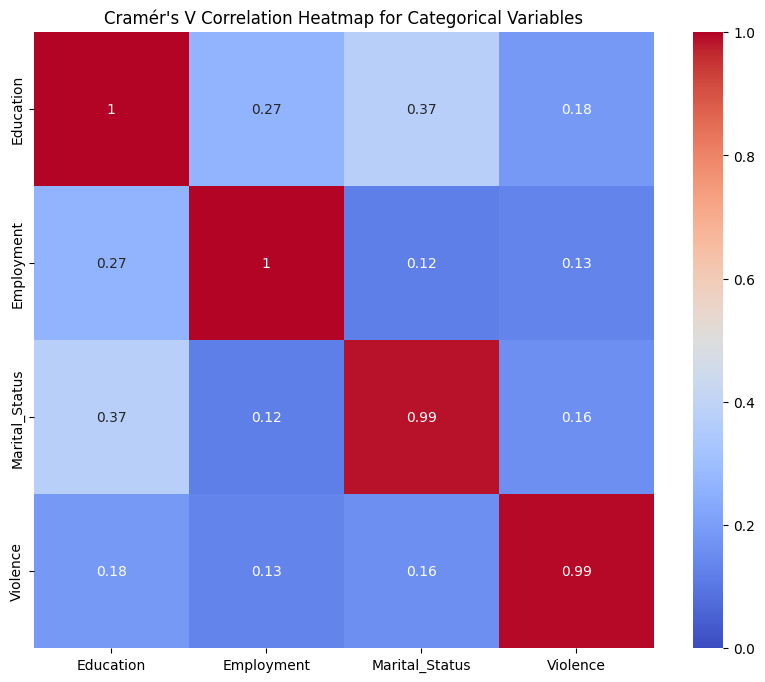

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Heatmap for Categorical Variables")
plt.show()

***Section 2.1 Further Data Exploration Analysis***

The Violence Outcome by Age Group chart shows the number of women who experienced violence compared with those who did not, across different age groups. It indicates that a larger number of women in the dataset have not experienced violence. However, it also shows that violence is distributed across all age groups, not limited to a specific range.

The Proportion of Violence Outcomes by Age Group chart illustrates the percentage of women within each age who experienced violence. It shows that older women (especially those over age 38) experienced violence at a higher proportion than younger women. However, it is important to note that the sample size of older women is smaller.

The Violence Outcome by Education chart  indicates that 34% of women with only a primary education experienced violence, which is significantly higher than the rates for women with higher education levels. Interestingly, only 20% of women with no formal education reported experiencing violence.

The Violence Outcome by Employment Group shows that approximately 27% of unemployed women experienced violence. In contrast, the rates are around 11% for semi-employed women and 23% for employed women.

An analysis of the correlation between education, employment, and marital status (all categorical variables) shows values ranging from 0.13 to 0.18, which are generally considered weak correlations. This suggests that no single variable is strongly associated with experiencing domestic violence.

***Section 3.0 Model Preparation and Modeling***

Encoding

In [67]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

ohe = OneHotEncoder(drop=None)

ct = ColumnTransformer([
    ('ohe', ohe, cat_cols)
], remainder='passthrough')

#fit for model
encoded_array = ct.fit_transform(df)

#feature names
ohe_feature_names = ct.named_transformers_['ohe'].get_feature_names_out(cat_cols)
final_col_names = list(ohe_feature_names) + num_cols

#new  dataframe
df_encoded = pd.DataFrame(encoded_array, columns=final_col_names, index=df.index)

In [68]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education_none            347 non-null    float64
 1   Education_primary         347 non-null    float64
 2   Education_secondary       347 non-null    float64
 3   Education_tertiary        347 non-null    float64
 4   Employment_employed       347 non-null    float64
 5   Employment_semi employed  347 non-null    float64
 6   Employment_unemployed     347 non-null    float64
 7   Marital_Status_married    347 non-null    float64
 8   Marital_Status_unmarried  347 non-null    float64
 9   Violence_no               347 non-null    float64
 10  Violence_yes              347 non-null    float64
 11  Age                       347 non-null    float64
 12  Income                    347 non-null    float64
dtypes: float64(13)
memory usage: 35.4 KB


In [69]:
#combine and rename target variable after encoding. Might could have just used label encoder instead of one hot for target
df_encoded['target'] = df_encoded['Violence_yes']

In [70]:
df_encoded.drop(columns=['Violence_yes','Violence_no'], inplace=True)

In [71]:
#Split and train for feature importance
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_FI = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42)
rf_FI.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [72]:
importances = pd.Series(rf_FI.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)

,0
Age,0.517989
Income,0.161482
Education_primary,0.087001
Employment_unemployed,0.044903
Education_secondary,0.030224
Education_tertiary,0.028902
Employment_employed,0.028714
Marital_Status_unmarried,0.028232
Employment_semi employed,0.027460
Marital_Status_married,0.024312


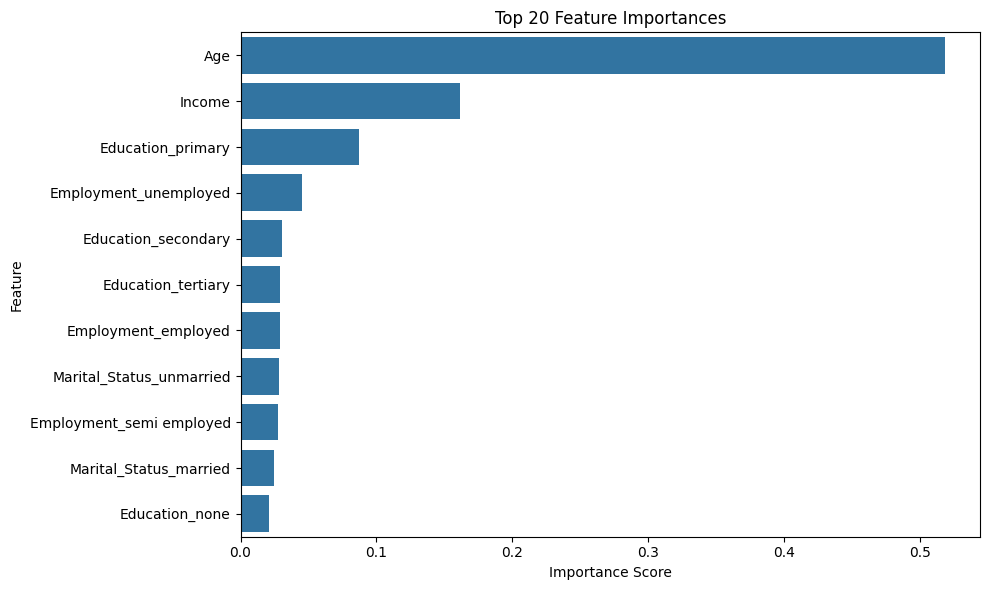

In [73]:
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted[:20], y=importances_sorted.index[:20])
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

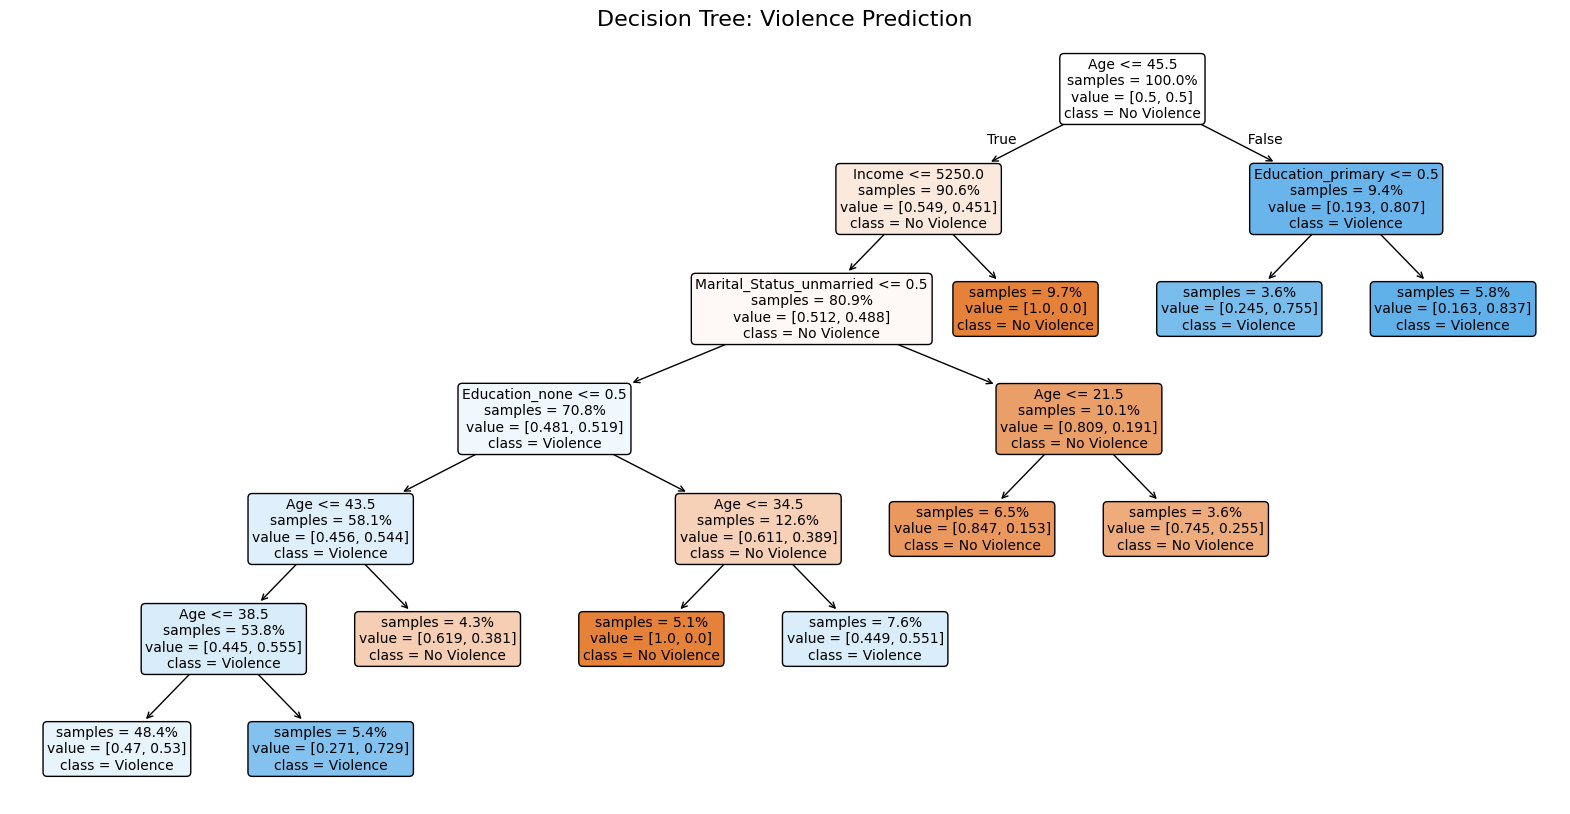

In [74]:
tree_clf = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, class_weight='balanced', random_state=42) #added class weight to account for 75% no's.
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))  # Wider figure = less cramped
plot_tree(tree_clf,
          feature_names=X.columns,
          class_names=['No Violence', 'Violence'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False,         # hides gini
          proportion=True         # shows % instead of raw counts
         )
plt.title("Decision Tree: Violence Prediction", fontsize=16)
plt.show()

***Section 3.1 Decision Tree Analysis***

The model indicates that women over age 45 with no education have an 81% risk of experiencing domestic violence, while women over 45 with a primary education have an even higher risk at 84%. This suggests that the risk is elevated among older women regardless of education level. However, it is important to note that this age group comprises only about 10% of the total sample.

Among women aged 38 to 43, those who are married, have some education, and a low income have a high risk of domestic violence at 73%. Additionally, married and educated women under age 38 show a moderate risk of 53%.

Interestingly, the model shows that women with an income above $5,250 ("low" income threshold) have almost no predicted risk of domestic violence, regardless of age or education level.